

# SymPy

La librairie [SymPy](http://docs.sympy.org/latest/index.html) est un outil très puissant permettant de faire du calcul symbolique. Cela signifie que les objets mathématiques sont représentés exactement, et non approximativement, et que les expressions mathématiques avec des variables non évaluées sont laissées sous forme symbolique.

Avant de commencer, assurez vous d’avoir sympy d'installé. Vous pouvez l’installer via pip :
```
pip install sympy
```
Nous devons ensuite importer la librairie pour pouvoir l'utiliser. Une façon simple de configurer SymPy et d'avoir déjà certaines variables courantes de définies est d'utiliser la fonction init_session() qui importera automatiquement tout de SymPy, créera des symboles courants, configurera l'affichage graphique et exécutera init_printing() qui permet un affichage agréable de mathématiques.

## Installation et importation
Avant de commencer, assurez vous d’avoir sympy d'installé. Vous pouvez l’installer via pip :
```
pip install sympy
```
Nous devons ensuite importer la librairie pour pouvoir l'utiliser. Une façon simple de configurer SymPy et d'avoir déjà certaines variables courantes de définies est d'utiliser la fonction init_session() qui importera automatiquement tout de SymPy, créera des symboles courants, configurera l'affichage graphique et exécutera init_printing() qui permet un affichage agréable de mathématiques.

In [215]:
from sympy import init_session
init_session() 


IPython console for SymPy 1.13.3 (Python 3.11.3-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.3/



## Manipulations de base
Dans le code ci-haut, la commande `symbols()` permet d'indiquer que les différents symboles doivent être traiter comme des variables mathématiques. On peut définir une nouvelle variable de la façon suivante :

In [216]:
w=symbols('w')

Sympy va manipuler les expressions en gardant des valeurs exactes.

In [217]:
sqrt(2)*3/6

Attention, si on n'utilise pas une fonction de Sympy pour définir une expression, Python ne la traitera pas de manière exacte.

In [218]:
1/3     

Par exemple, pour définir la fraction 1/3 comme un nombre rationnel :

In [219]:
Rational(1,3)

On peut toujours évaluer numériquement une expression à l'aide de la fonction `N(expression)`. On peut ajouter un paramètre optionnel pour déterminer la précision voulu. Ici, on utilise la constante $\pi$ de Sympy.

In [220]:
N(pi, 50) # pi évalué avec 50 décimales

On peut faire des opérations algrébriques à partir des symboles que l'on a définit. La plupart des fonctions mathématiques usuelles sont disponibles dans Sympy.

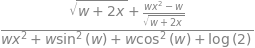

In [221]:
expression1=((w*x**2-w)/sqrt(2*x+w)+sqrt((2*x+w)))/(w*x**2+w*cos(w)**2+w*sin(w)**2+log(2)) #remarquez que pour faire un exposant, on utilise ** et non ^
expression1 #affiche l'expression

Par défaut, les fonctions trigonométriques utilisent les radians et la fonction `log`, comme dans la plupart des langages de programmation, est le logarithme naturel.

Sympy nous permet de réaliser de nombreuses opérations mathématiques qui seraient fastidieuses à faire à la main. Par exemple, on peut simplifier une expression :

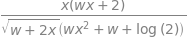

In [222]:
expression1.simplify() #simplifie l'expression

On vient d'utiliser `simplify` comme une méthode de notre expression. La plupart des méthodes peuvent aussi être utiliser comme des fonctions.

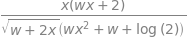

In [223]:
simplify(expression1) #simplifie l'expression

On peut développer ou factoriser une expression :

In [224]:
polynome1=(2*x+1)**5 #un polyôme de degré 5 factorisé
polynome1.expand() #développe le polynôme

In [225]:
factor(108*w**5-45*w**3+5*w**2+5*w-1) #factorise un polynôme

Sympy nous permet également de résoudre des équations. La fonction `solve` permet de trouver les racines (les zéros) d'une expression. Le premier paramètre de la fonction est l'expression dont on cherche les zéros et le second paramètre est la variable pour laquelle on veut résoudre. La ou les solutions retourner sont sous forme de liste.

In [226]:
solve(expression1,w) #résoud l'équation expression1=0 en w

In [227]:
x1=solve(expression1,x)[0] #résoud l'équation expression1=0 en x et attribue la première solution à x1
x1

Pour évaluer une expression lorsque les variables qu'elle contient doivent être remplacer par d'autres expressions ou par des valeurs spécifiques, on doit utiliser la méthode `subs()`.

In [228]:
polynome1.subs(x,10) #remplace w par 10 dans le polynôme polynome1

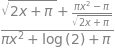

In [229]:
expression1.subs(w,pi) #remplace w par la constante pi dans l'expression1

In [230]:
expression1.subs(x,x1) #remplace x par x1 trouver plus haut dans l'expression1

On peut aussi résoudre des équations spécifique en définissant une équation à l'aide de la fonction `Eq(coté_gauche,coté_droit)`. En effet, les symboles `=` et `==` ne permettent pas de définir une équation puisqu'ils sont déjà utilisés par Python pour autre chose. C'est une caractéristique de base de la librairie Sympy, elle ne change jamais le comportement habituel du langage Python.

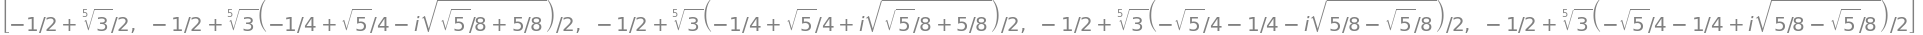

In [231]:
solve(Eq(polynome1,3),x) #résoud l'équation polynome1=2 en x

On peut voir dans les solutions précédentes que certaines solutions comportent une variable `i`. C'est que Sympy défini par défaut des variables comme faisant partie des nombres complexes qui sont une généralisation des nombres réels. Comme nous ne traitons pas les nombres complexes dans ce cours, nous pouvons soit ignorer ces solutions, soit définir nos variables comme faisant partie des réels.

In [232]:
u = Symbol('u',real=True) #u sera mainenant traité comme une variable mathématique réelle

In [233]:
solve(Eq(polynome1.subs(x,u),3),u) #résoud l'équation polynome1=2 après avoir remplacé x par u

# Calcul différentiel

Regardons maintenant les principales opérations que l'on veut faire en calcul différentiel. 

## Définition et évaluation de fonction
Nous allons travailler avec la fonction : 
$$
f(x) = xe^{x}.
$$
Commençons par la définir.

In [234]:
f=x*exp(x) #on définit une fonction f à partir de x qui est déja défini comme un symbole. La fonction exponentielle est définie par exp().
f

On peut évaluer la fonction :

In [235]:
f.subs(x,2) #on remplace x par 2 dans la fonction f

Par défaut, les valeurs renvoyés sont sous formes exactes. On peut avoir une approximation numérique à l'aide de la fonction `N()`.

In [236]:
N(f.subs(x,2)) #on remplace x par 2 dans la fonction f et on évalue le résultat numériquement

## Limite
On peut évaluer des limites à l'aide de la fonction `limit(fonction,variable,valeur)`. Par exemple, si on veut évaluer
$$
\lim_{{x \to -\infty}} f(x).
$$

In [237]:
limit(f, x,-oo) #on calcule la limite de f en x tendant vers -infini. 

On sait donc que l'on est en présence d'une asymptote horizontale en `y=0`. On peut aussi mettre `oo` pour évaluer la limite à l'infini ou une valeur numérique.

In [238]:
limit(f,x,oo) #on calcule la limite de f en x tendant vers +infini

In [239]:
limit(f,x,3) #on calcule la limite de f en x tendant vers 3

On peut également évaluer la limite à gauche ou la limite à droite en ajoutant '+' ou '-' comme quatrième paramètre.

In [240]:
limit(1/x, x, 0,'+')   #on calcule la limite de 1/x en x tendant vers 0 par la droite

In [241]:
limit(1/x, x, 0, '-')   #on calcule la limite de 1/x en x tendant vers 0 par la gauche

## Dérivation
On peut facilement dériver une fonction à l'aide de la méthode `diff(variable)`.

In [242]:
f1=f.diff(x) #on définit f1 comme la dérivée de f par rapport à x
f1

On peut vérifier que cette dérivée correspond bien à la définition de la dérivée à l'aide de la limite.

In [243]:
h=symbols('h') #on définit h comme un symbole
limit((f.subs(x,x+h)-f)/h,h,0) #on calcule la dérivée de f en x en utilisant la définition de la dérivée

On peut ensuite trouver facilement les zéros de la dérivée.

In [244]:
solve(f1,x) #on résoud l'équation f1=0 en x

La méthode `diff(variable,n)` permet également d'obtenir la n-ième dérivée de la fonction. 

In [245]:
f2=f.diff(x,2) #on définit f2 comme la dérivée seconde de f par rapport à x 
f2

## Tracer de courbe

Sympy permet également de tracer facilement une fonction à l'aide de la fonction `plot(fonction,(variable,valeur_min,valeur_max))`. L'installation de la librairie matplotlib est recommandée pour avoir un bon affichage des graphiques. La commande `%matplotlib inline` permet d'afficher les graphiques directement dans le notebook.

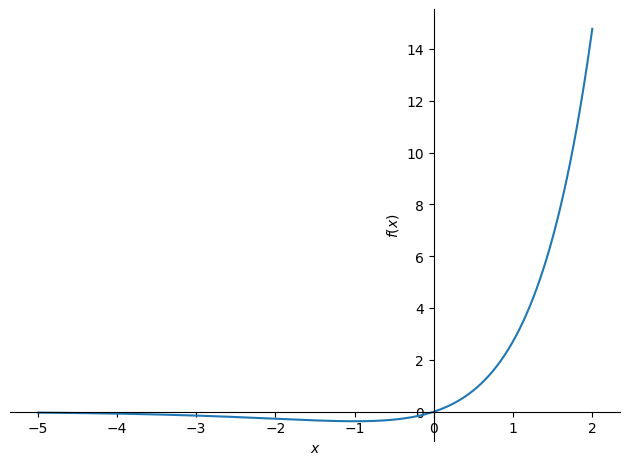

In [253]:
%matplotlib inline
plot(f, (x, -5, 2))  # on trace le graphe de f en x allant de -5 à 2

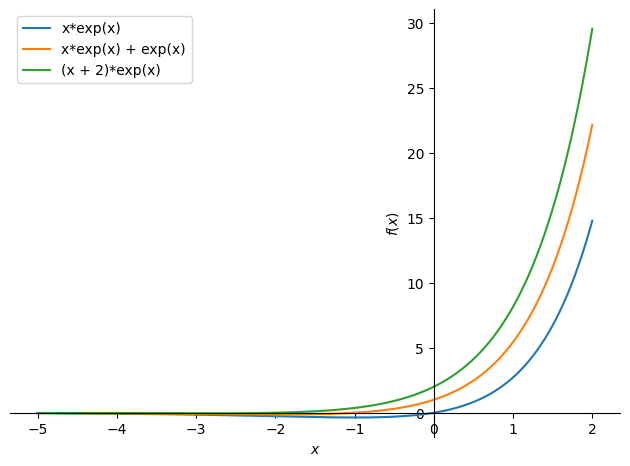

In [254]:
plot(f, f1, f2, (x, -5, 2), legend=True)  # on trace le graphe de f, f1 et f2 en x allant de -5 à 2 avec une légende

## Dérivation et tracer de courbe implicite
Nous terminerons avec un exemple d'utilisation de Sympy pour tracer la tangente à une courbe définie par une équation implicite. Nous utiliserons la fonction `idiff(expression, var_dépendante, var_indépendante)` pour obtenir la dérivée de y par rapport à x. L'expression doit corresponde au côté gauche de l'équation étudier quand on la met en égalité avec 0. Par exemple, le cercle de rayon 1 :
$$
x^2+y^2=1
$$
Correspond à l'équation : 
$$
x^2+y^2-1=0
$$

In [248]:
cercle = x**2 + y**2 - 1 #on définit un cercle de rayon 1, 
cercle

In [249]:
dy_dx=idiff(cercle,y,x) #on dérive y par rapport à x implicitement à partir de l'équation du cercle
dy_dx

Trouvons maintenant la valeur de la pente et de l'ordonnée à l'origine des droite tangentes lorsque $x=\sqrt2/2$.

In [250]:
valeurs_y=solve(cercle.subs(x,sqrt(2)/2),y) #on trouve les valeurs de y pour x=sqrt(2)/2)
valeurs_y


In [251]:
pente1=dy_dx.subs(x,sqrt(2)/2).subs(y,valeurs_y[0]) #on remplace x et y par leur valeur pour obtenir la pente au point voulu.
pente2=dy_dx.subs(x,sqrt(2)/2).subs(y,valeurs_y[1])
ord_origine1=valeurs_y[0]-pente1*sqrt(2)/2 #on trouve l'ordonnée à l'origine pour la première pente
ord_origine2=valeurs_y[1]-pente2*sqrt(2)/2 #on trouve l'ordonnée à l'origine pour la deuxième pente

On peut maintenant tracer le cercle avec les tangentes. Pour tracer une équation implicite, nous reprenons notre expression en utilisant la fonction `plot_implicit()` avec l'option `show=False` pour permettre d'ajouter plusieurs éléments au même graphique.

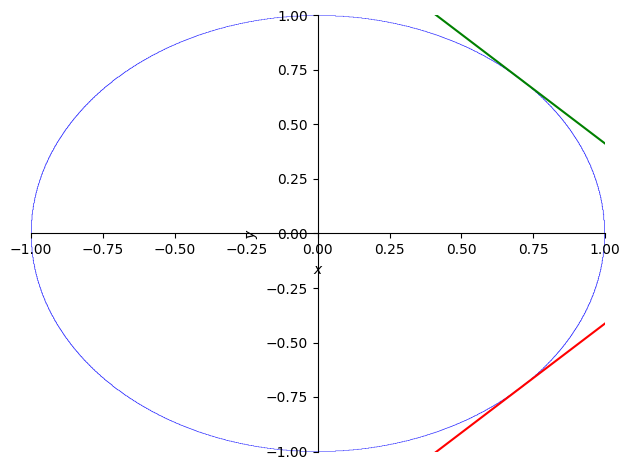

In [252]:
plot1=plot_implicit(cercle, (x, -1, 1), (y, -1, 1),show=False) #on trace le cercle sans afficher le graphe
plot2=plot(pente1*x+ord_origine1,line_color='red',show=False) #on trace la tangente rouge
plot3=plot(pente2*x+ord_origine2,line_color='green',show=False) #on trace la tangente verte
plot1.extend(plot2) #on ajoute la tangente rouge au cercle
plot1.extend(plot3) #on ajoute la tangente verte au cercle
plot1.show() #on affiche le cercle avec les tangentes